## <p style="text-align: right;"> &#9989; Nathan Kurt</p>

# CMSE 201 Final (Section 001 - Fall 2018)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed thus far this semester. In particular, you'll load, manipulate, and plot data using Pandas and Matplotlib; fit data using NumPy and/or SciPy; and describe agent-based models and think about how to create one. You should find that you have all of the skills necessary to complete this exam having completed CMSE 201!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. You might want to make sure you have access to any data you need and that you can get it loaded into your notebook sooner than later, in case you run into issues. Let your instructor know right away if you have problems with accessing the data.

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.** If you are seen accessing your email, using a chat program (e.g. Slack), or any sort of collaborative cloud storage or document software (e.g. Google Documents), you will be at risk for receiving a zero on the exam. You are also expected to complete the exam **without** using old notebooks from class.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero.

In [49]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
random.seed(3942342)
from scipy.integrate import odeint
from IPython.display import display, clear_output, set_matplotlib_formats
from scipy.optimize import curve_fit

---
## Part 1: Load, manipulate, and analyze data (using Pandas and Matplotlib) (33 points)

For this question, you will be working with the "births.csv" file, located in D2L. This data set was downloaded from https://github.com/fivethirtyeight/data/tree/master/births.

This file contains information about US births from 1994 to 2003, and contains five columns:
    - column 1: year      (from 1994 to 2003)
    - column 2: month     (from 1 to 12)
    - column 3: date_of_month    (from 1 to 28, 30 or 31)
    - column 4: day_of_week      (from 1 to 7)
    - column 5: births           (# of births during that day)

1) (3 points) Load the "births.csv" file (located in D2L) using Pandas.

In [12]:
# Write your response here
births = pd.read_csv("births.csv")

2) (4 points) What is the average number of births a day during 1994-2003 in the US? What is the maximum number of births a day during 1994-2003 in the US?


In [13]:
# Write your response here
average_births = births["births"].mean()
max_births = births["births"].max()

print(f'Average Births A Day During 1994 - 2003: {average_births}\n')
print(f'Max Births A Day During 1994-2003: {max_births}')


Average Births A Day During 1994 - 2003: 10876.817360350493

Max Births A Day During 1994-2003: 14540


3) (4 points) Plot a histogram for the number of births in the US from 1994-2003. Make sure to include a title and axis labels!

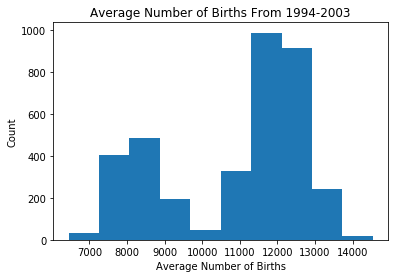

In [85]:
years = [i for i in range(1994,2004)]
plt.hist(births["births"])
plt.title("Average Number of Births From 1994-2003")
plt.xlabel("Average Number of Births")
plt.ylabel("Count")
plt.show()

4) (2 points) Considering the histogram, discuss whether or not the mean (of the number of births) is meaningful representation of that dataset.

I don't think the mean number of births is very meaningful since by looking at the histogram it doesn't even seem close to be the most likely number of births. I think doing the median would be a more helpful number if you want to see the most common average number of births. 

5) (7 points) Use masking to find the total number of births for each year from 1994 to 2003. Plot the number of births vs. the year on a plot. Make sure to include a title and axis labels! What trend do you see?

Hint: You are HIGHLY encouraged to make use of loops to answer this question.

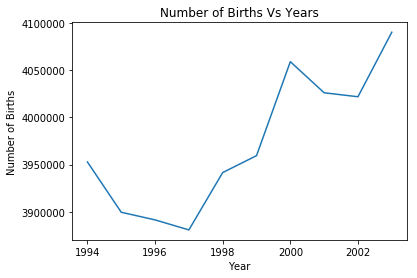

In [39]:
# Write your response here
years = [i for i in range(1994,2004)]
vals = []
for i in years:
    mask =  (births["year"] == i)
    births_year = births[mask]
    vals.append(births_year["births"].sum())
    
plt.plot(years,vals)
plt.title("Number of Births Vs Years")
plt.xlabel("Year")
plt.ylabel("Number of Births")
plt.show()
    

I see a trend of the amount of births increasing as time goes on. 

6) (5 points) Find the number of days from 1994-2003 when the number of births in the US exceeded 13500.

In [21]:
# Write your response here
mask = births["births"] > 13500

print(f"Days Where Births Were Greater than 13500: {len(births[mask])}")

Days Where Births Were Greater than 13500: 55


7) (6 points) Find the MOST and LEAST "popular" month to be born in the US in the time range 1994-2003 by computing the total number of births per month. 

Hint: You are HIGHLY encouraged to make use of loops to answer this question.

In [47]:
# Write your response here
months = [i for i in range(1,13)]
vals = []
for i in months:
    mask_month =  (births["month"] == i)
    births_month = births[mask_month]
    vals.append(births_month["births"].sum())
    
print(f"Max Month Is {vals.index(max(vals))+1}")

print(f"Min Month is {vals.index(min(vals))+1}")


Max Month Is 8
Min Month is 2


8) (2 points) Discuss how the above comparison might be biased (based on different number of days per months), and present a way of how one can make a more careful comparison.

Since some months like February(which has the least amount of births) has the least amount of days, it is much more likely to have the least amount of births. A better way to do this would be to find the average # of births each month and then calculate the max and mins of those. 

#### ---
## Part 2: Fit data using NumPy and/or SciPy (34 points)

For this question, you will be working with the "pop.csv" data set, which can be found in D2L. This data set was downloaded from https://www.stats.govt.nz/large-datasets/csv-files-for-download/.  

 This data set includes information about New Zealand's population EVERY THREE MONTHS from 6/30/08 to 6/30/18.
 
 The IMPORTANT column of the data set is the seventh column, which notes the population of New Zealand at a given time. The first column gives the date of the measurement.

1) (5 points) Load the seventh column of the "pop.csv" file (located in D2L), named "population" using NumPy or Pandas. Make sure to skip rows, use a correct delimiter, and the right column.

In [57]:
pop = pd.read_csv("pop.csv", delimiter=",", header=0)
population = pop["population"]
population.head()

0    4259800.0
1    4269600.0
2    4280300.0
3    4293500.0
4    4302600.0
Name: population, dtype: float64

2) (4 points) Use NumPy to create an array of 41 values, starting with 0, increasing by 3 each time. The last entry of your array should be 120. This array will represent the number of months since 6/30/08. You will be using this array for the x-axis in your plots, instead of the calendar date.

In [60]:
# Write your response here
numpy_array = np.linspace(0,120,41)
numpy_array

array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
        33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
        66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,
        99., 102., 105., 108., 111., 114., 117., 120.])

3) (6 points) Plot the population of New Zealand vs. the number of months since 6/30/08, the first date of the data set. You should use the array you created in the previous question. Make sure to include a title and axis labels!

   You should use either a scatter plot or plot all the points separately!

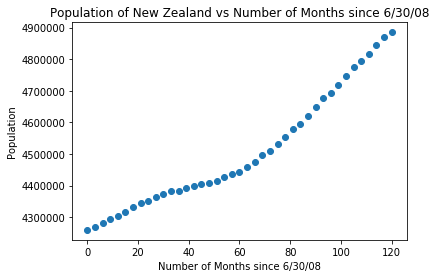

In [62]:
# Write your response here
plt.scatter(numpy_array, population)
plt.title("Population of New Zealand vs Number of Months since 6/30/08")
plt.xlabel("Number of Months since 6/30/08")
plt.ylabel("Population")
plt.show()

4) (8 points) Using $polyfit$, create a seventh order polynomial fit to the data. Plot the original data as either a scatter plot or plot all the points separately. Add the plot of the seventh order polynomial fit. Make sure to include a legend, title and axis labels!

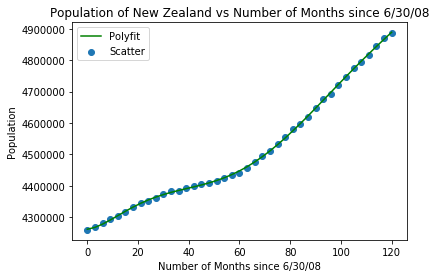

In [69]:
# Write your response here
parameters = np.polyfit(numpy_array, population, 7)

seventh = np.poly1d(parameters)
expected_seventh = seventh(numpy_array)
plt.scatter(numpy_array, population, label = "Scatter")
plt.title("Population of New Zealand vs Number of Months since 6/30/08")
plt.xlabel("Number of Months since 6/30/08")
plt.ylabel("Population")
plt.plot(numpy_array, expected_seventh, color="Green", label = "Polyfit")
plt.legend()
plt.show()

5) (8 points) Use $curvefit$ to create a fit to the data, using the function $Ae^{-Bx}+ C$. Plot the original data as either a scatter plot or plot all the points separately. Add the plot of the seventh order polynomial fit. Make sure to include a legend, title and axis labels!

/usr/local/Cellar/ipython/6.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


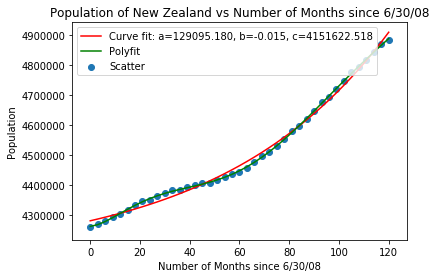

In [78]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, numpy_array, population)

plt.plot(numpy_array, func(numpy_array, *popt), 'r-', label='Curve fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.scatter(numpy_array, population, label = "Scatter")
plt.title("Population of New Zealand vs Number of Months since 6/30/08")
plt.xlabel("Number of Months since 6/30/08")
plt.ylabel("Population")
plt.plot(numpy_array, expected_seventh, color="Green", label = "Polyfit")
plt.legend()
plt.show()



6) (3 points) Elaborate on the results of the two different methods, including which one you think is the better model.

Polyfit is nice if you don't have any equations and just want to see a relationship with the data but curve fit is good if you have an equation and want to see how closely your data matches up to the equation. Polyfit requires you to do some crude guessing until you get a model that looks right while curve fit will get the closest model for you data so curve fit is better

### ---
## Part 3: Describe what an agent-based model is and come up with a plan for building one (33 points)

Please answer the following questions:

* (5 points) What is an agent-based model? 

* (8 points) Provide 2 examples of problems that one might be able to study using an agent-based model.


* (20 points) Formulate a plan for an agent-based model of an international labor market. Here, the main goal is to have a job, and jobs are available according to a country’s economic situation. If a person has been unhappy with their job situation for a certain time period, it moves to another country. The planning of this agent-based model should involve: 
   - defining the agents and the worlds of the model.   
   - defining some rules    
   - outlining how one would keep track of the agents and the worlds   
   - explaining the process for updating the model. 
   


NOTE: You are NOT expected to write up any code for this section. 

*Write your response in this markdown cell*
* (5 points) What is an agent-based model? 
    * An agent-based model is a small-scale model that simulate a simultaneous operations and interactions with other things so you can re-create and predict the apperance of complex things.

* (8 points) Provide 2 examples of problems that one might be able to study using an agent-based model.
    * The Spreading of a forest fire and what the surrounding area looks like over the course of the fire
    * The location of sheep as they are being herded into a pen. 

* (20 points) Formulate a plan for an agent-based model of an international labor market. Here, the main goal is to have a job, and jobs are available according to a country’s economic situation. If a person has been unhappy with their job situation for a certain time period, it moves to another country. The planning of this agent-based model should involve: 
   - defining the agents and the worlds of the model.   
   - defining some rules    
   - outlining how one would keep track of the agents and the worlds   
   - explaining the process for updating the model. 
   
    * The agents here are going to be the country, and the person. 

    * Rules would need to be set like a happiness threshold, an economic situation threshold for weather or not someone can get a job, and how long it takes for someone being unhappy before they move. 

    * You would start out with a list of countries that has an economy value associated with it. For the starting value of each economy, you would use a random number that would represent how many jobs are available and the current score. and would keep track of that in a list you append to each time you update. You would then probably start out with a list of people that has indexes about what country they live in(will start out random) if they have a job,  happiness, and how long they have been unhappy(counter starts at 0 and gets reset if their happiness value goes above threshold) 

    * The happiness value would probably be a random value set each time and if that value happens to be below the threshold for X amount of time, then you would remove them from the model and update. This would affect the economic situation by either opening up a job for another person to join or hurting the economic standing by decreasing jobs depending on how you are looking at the model. And we would assume that when a person leaves the country, they would always go to the best economy available with jobs at the time. 


---
## You're done! Congrats on finishing your CMSE 201 Final!

Upload a copy of this notebook to the submission folder on D2L and make sure your name is on it! Thank you for a great semester!